<a href="https://colab.research.google.com/github/prernasinghal88/Are-you-sure-to-Insure-/blob/version-3/greyatom_gonza_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurer Project

Import libraries

In [0]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Download the data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load dataset 

test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/test.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/train.csv')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/greyatom/sample_submission.csv')

In [0]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


## Data Exploration Analysis



In [0]:
df.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [0]:
#pip install pandas-profiling

### Profile Report

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(df)


Number of variables,12
Number of observations,50553
Total Missing (%),5.9%
Total size in memory,4.6 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
#pfr = pandas_profiling.ProfileReport(df)
#pfr.to_file("/tmp/example.html")

In [0]:
#pfr

### Visualization Analysis

#### Pairplot

Pairplot Vizualization - By categorical element: "Claim"

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


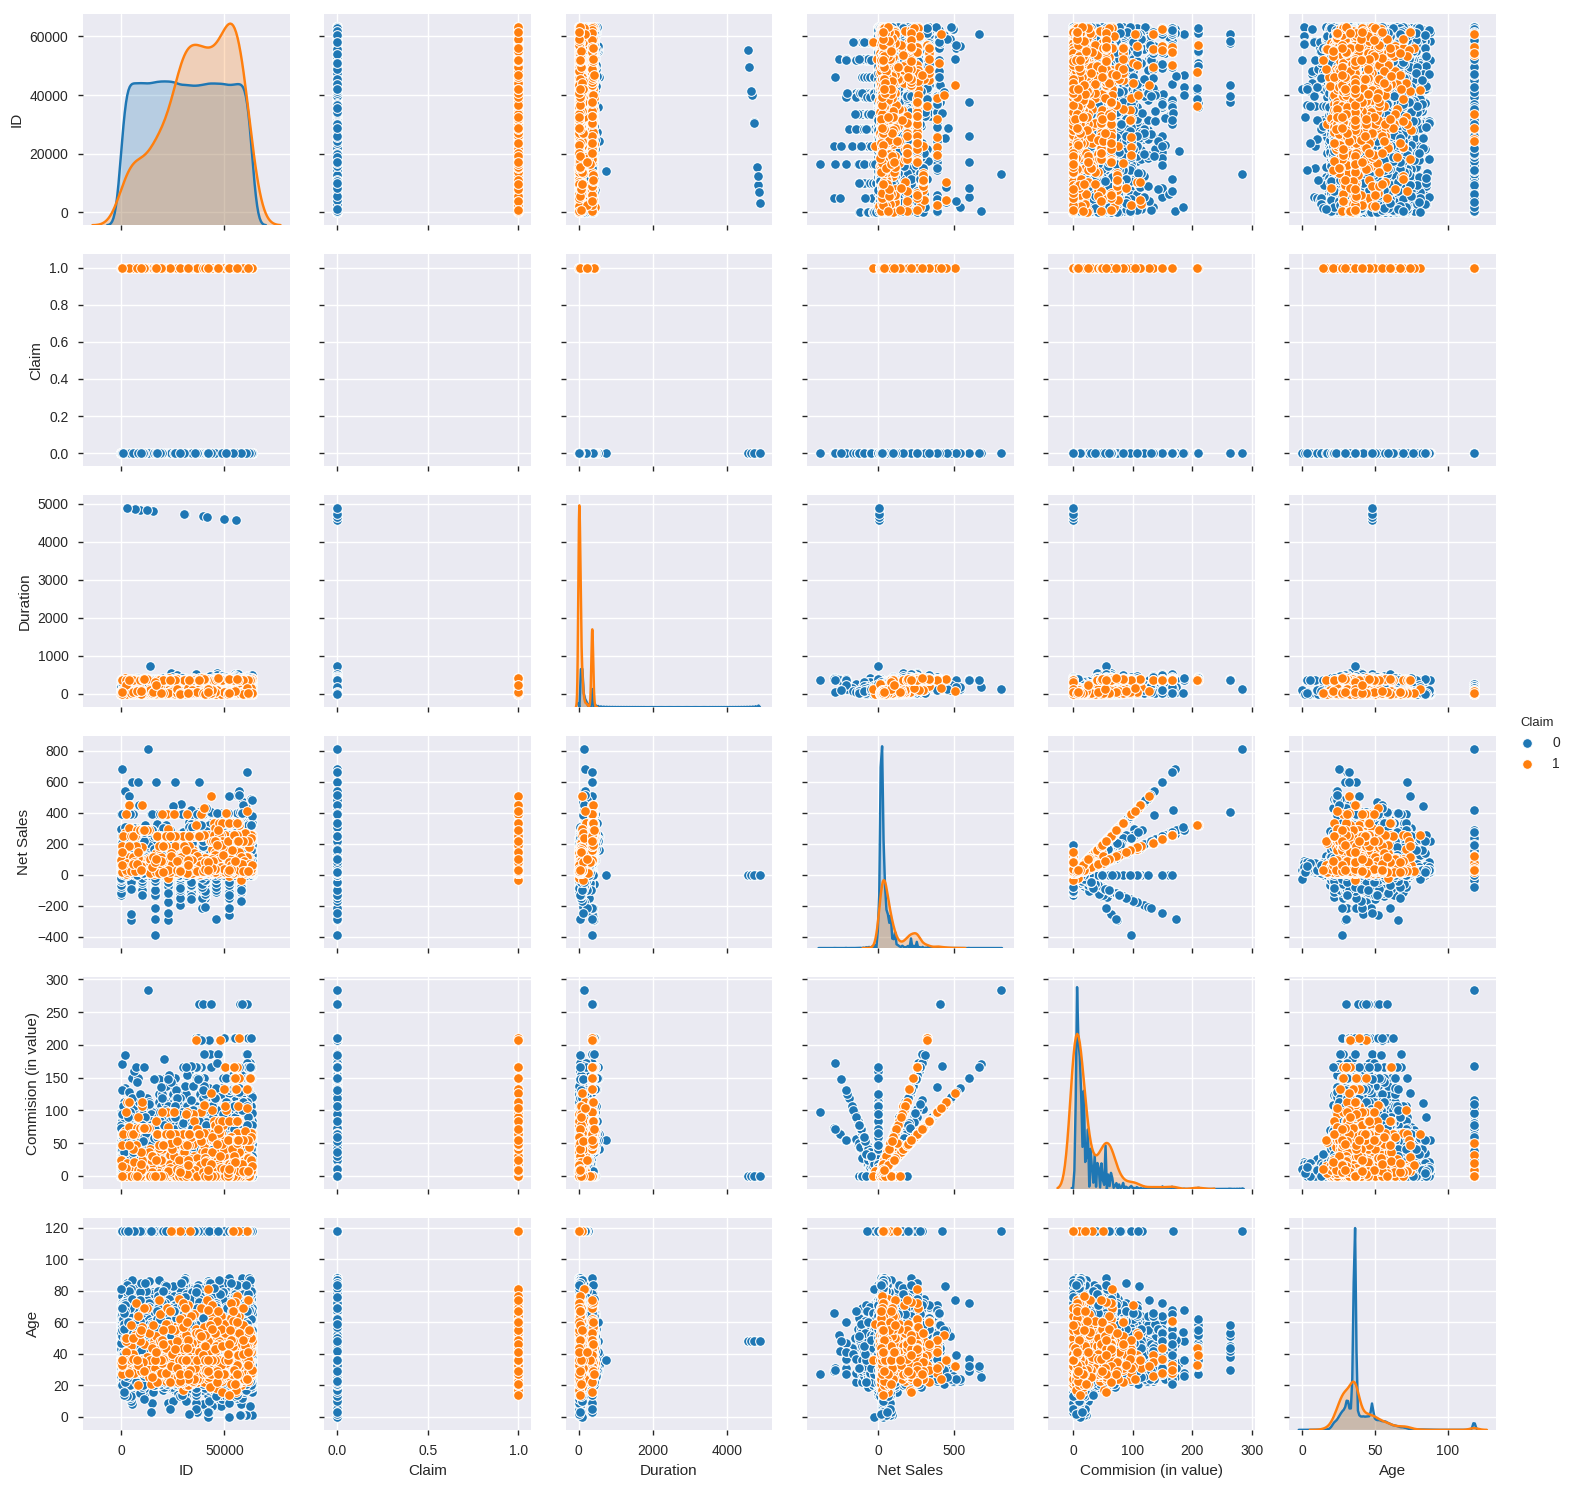

In [0]:
sns.pairplot(df, hue='Claim')

####  Agency Type Analysis

Claim rate from Agency Type 'Airlines" is 3.5% whereas Agency type "Travel Agent" is only 1%.'

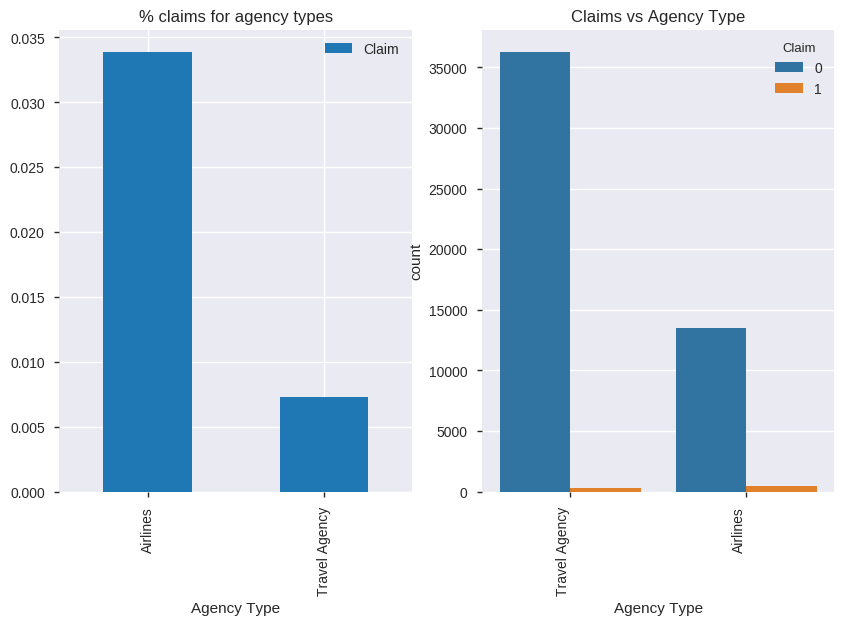

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Agency Type','Claim']].groupby(['Agency Type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Agency Type',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### Claims and Age Analysis

Text(0.5, 1.0, 'Claims Rate by Age')

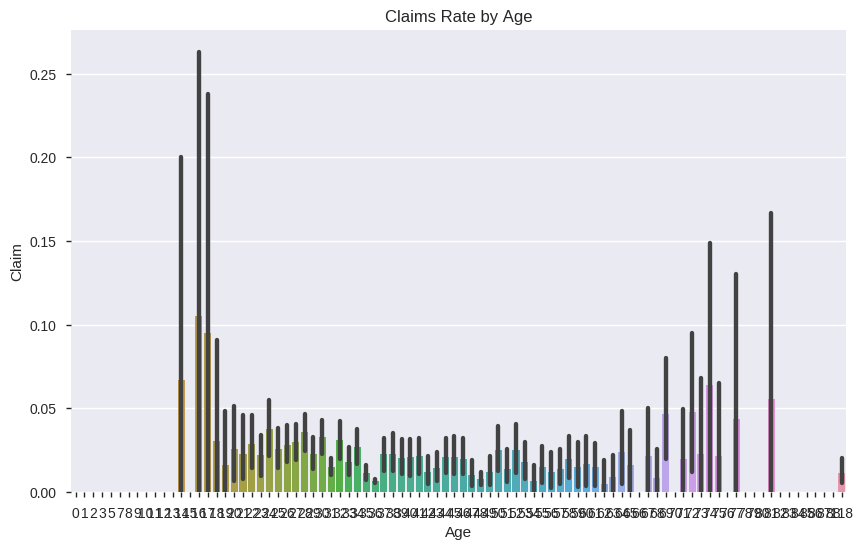

In [0]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='Age',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

#### Claims and Product Name Analysis

Most of the passed claims are from Product Name 'Bronze Plan", followed by "Annnual Silvver' and "2 Way Comprenhensive"

However, Annual travel protect Gold has highest % of claims getting passed which is around 12%, followed by Annual Gold Plan and Annual Silver Plan


In [0]:
#Visualization on Claims only
claim_y = df[df['Claim'] ==1]

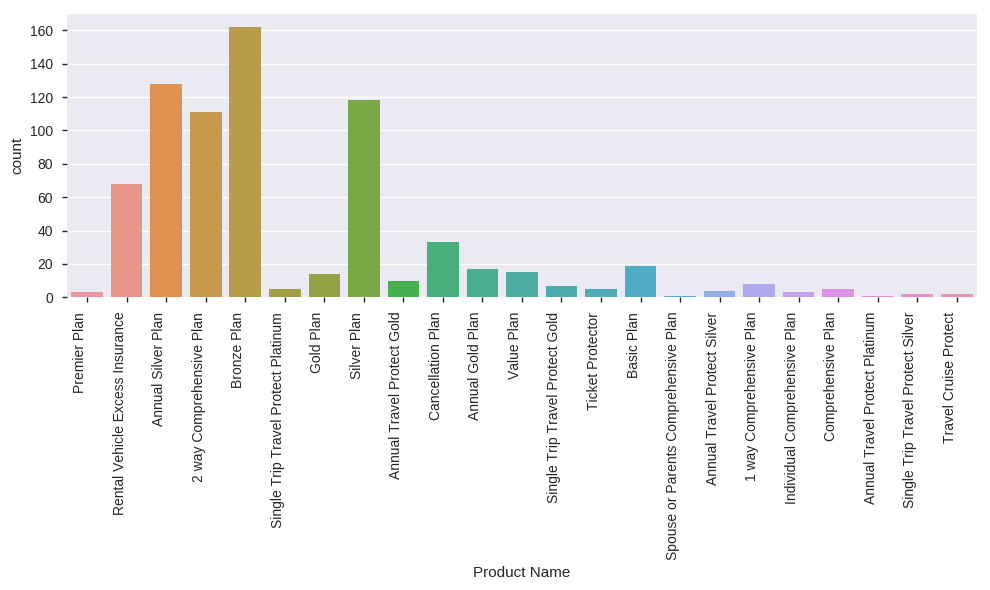

In [0]:
f,ax=plt.subplots(1, figsize=(10,6))
ax = sns.countplot(x='Product Name',data=claim_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

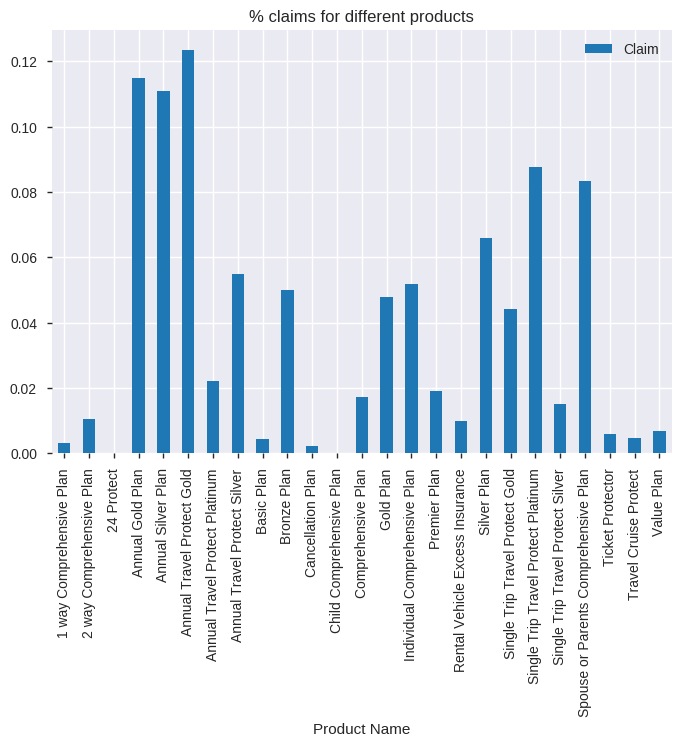

In [0]:
df[['Product Name','Claim']].groupby(['Product Name']).mean().plot.bar()
plt.title('% claims for different products')
plt.show()

#### Claims and Distribution Channel Analysis

In [0]:
df.groupby(['Distribution Channel','Claim'])['Claim'].count()

Distribution Channel  Claim
Offline               0          871
                      1           17
Online                0        48941
                      1          724
Name: Claim, dtype: int64

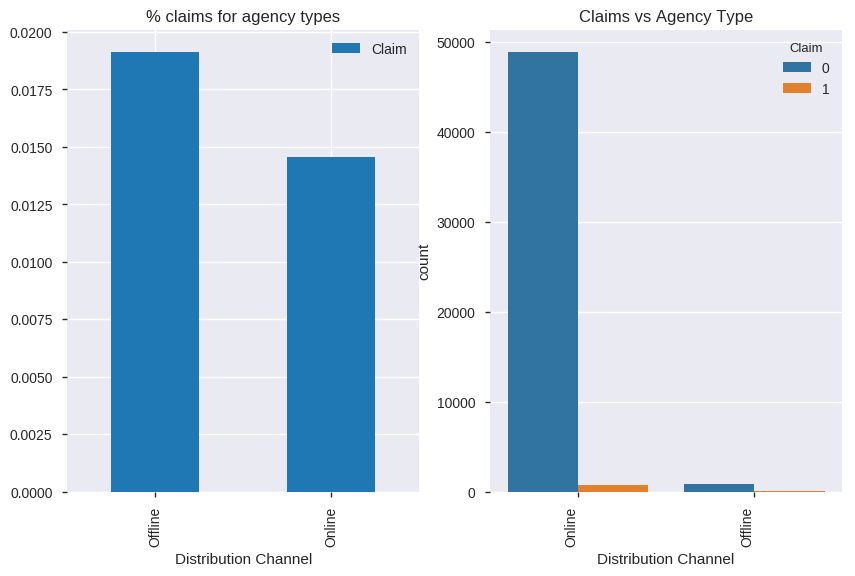

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Distribution Channel','Claim']].groupby(['Distribution Channel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Distribution Channel',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


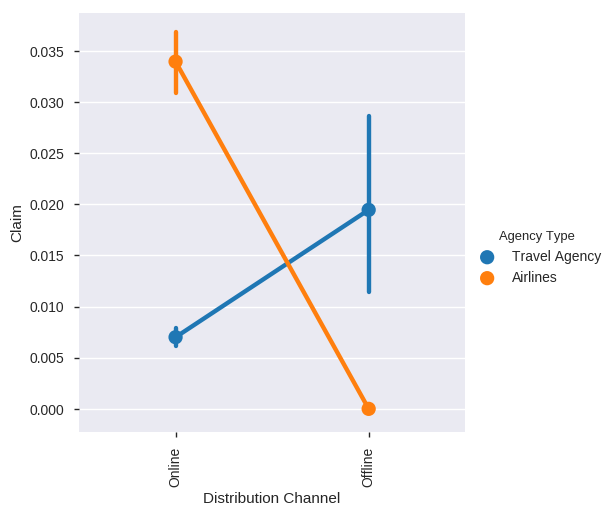

In [0]:
sns.factorplot('Distribution Channel','Claim',hue='Agency Type',data=df)
plt.xticks(rotation= 90)
plt.show()

#### Crosstab  Analysis for top variables

Majority of the Claims sold are coming from online channel, Agency type and "Cancellation Plan" product.

Interesting thing to note is none of the claim is passed in case it is sold by Airlines from offline distribution channel.

In [0]:
pd.crosstab([df['Distribution Channel'],df['Agency Type'],df['Claim']],df['Product Name'],margins=True)

Product Name                              1 way Comprehensive Plan  ...    All
Distribution Channel Agency Type   Claim                            ...       
Offline              Airlines      0                             0  ...     14
                     Travel Agency 0                             2  ...    857
                                   1                             2  ...     17
Online               Airlines      0                             0  ...  13490
                                   1                             0  ...    474
                     Travel Agency 0                          2638  ...  35451
                                   1                             6  ...    250
All                                                           2648  ...  50553

[8 rows x 26 columns]

## Data Cleanning

### Skewness

Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [0]:
# Skew for each attribute
skew = df.skew()
print(skew)

ID                      1.413e-04
Claim                   8.077e+00
Duration                2.287e+01
Net Sales               3.328e+00
Commision (in value)    4.078e+00
Age                     2.978e+00
dtype: float64


##### Histograms

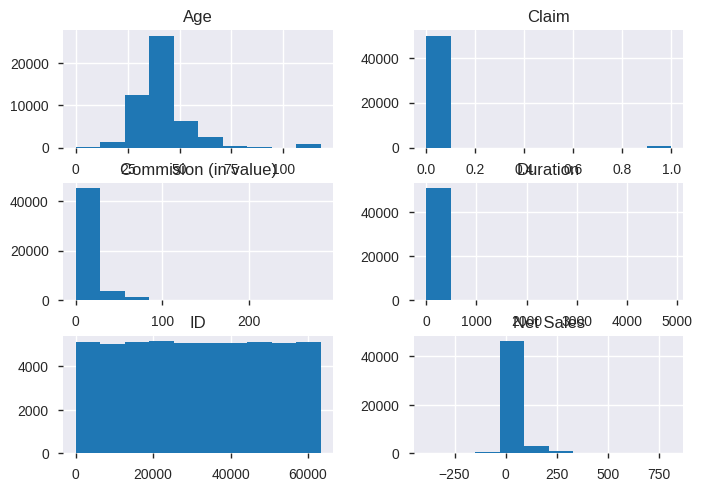

In [0]:
# Univariate Histograms

df.hist()
plt.show()

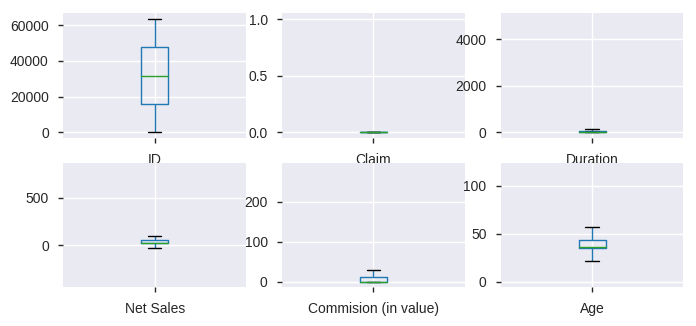

In [0]:
 # Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
plt.show()

#### Outliers - Qaurtiles

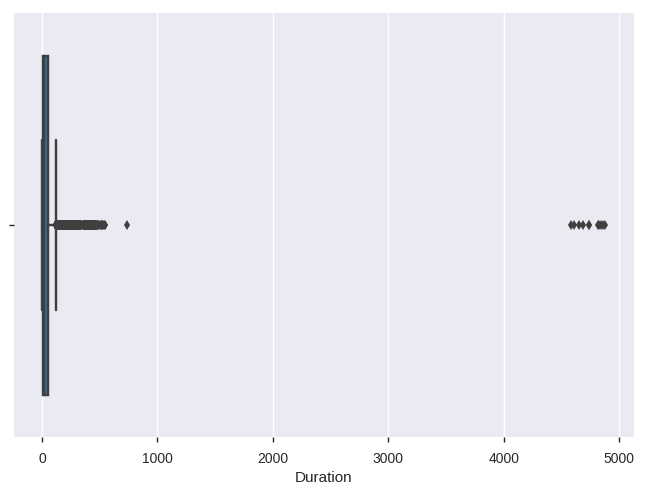

In [0]:
sns.boxplot(y=df["Duration"],orient='h')

In [0]:
print('Mean of Duration:', df['Duration'].mean())
print('Median of Duration:',df['Duration'].median())

Mean of Duration: 49.4259687852353
Median of Duration: 22.0


#### Interquartile range

An outlier is anything smaller than Q1 or greater than Q3. Notice how the mean of "searches" after removal period is greater than Q3.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [0]:
from numpy import percentile
duration = df.Duration
# calculate interquartile range
q1 = df.Duration.quantile(q=.25)
q3 = df.Duration.quantile(q=.75)

iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
# identify outliers
outliers = [x for x in duration if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in duration if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=9.000, 75th=53.000, IQR=44.000
Identified outliers: 4465
Non-outlier observations: 46088


In [0]:
#sns.boxplot(y=df["Duration"],orient='h')

#### Remove Negative Value - Net Sales

In [0]:
print('Maximum net sales :',df['Net Sales'].max())
print('Minimum Net sales :',df['Net Sales'].min())
print('Average Net Sales :',df['Net Sales'].mean())

Maximum net sales : 810.0
Minimum Net sales : -389.0
Average Net Sales : 40.80097659881748


In [0]:
#Remove negative values( we are not removing negative values for net sales)
df['Net Sales'][df['Net Sales'] < 0] = 0
print('Minimum Net sales :',df['Net Sales'].min())

Minimum Net sales : 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Remove Negative Value - Duration

In [0]:
print('Minimum Duration :',df['Duration'].min())


Minimum Duration : -2


In [0]:
df['Duration'][df['Duration'] < 0] = 0
print('Minimum Duration :',df['Duration'].min())

Minimum Duration : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[8.0, 5.5]


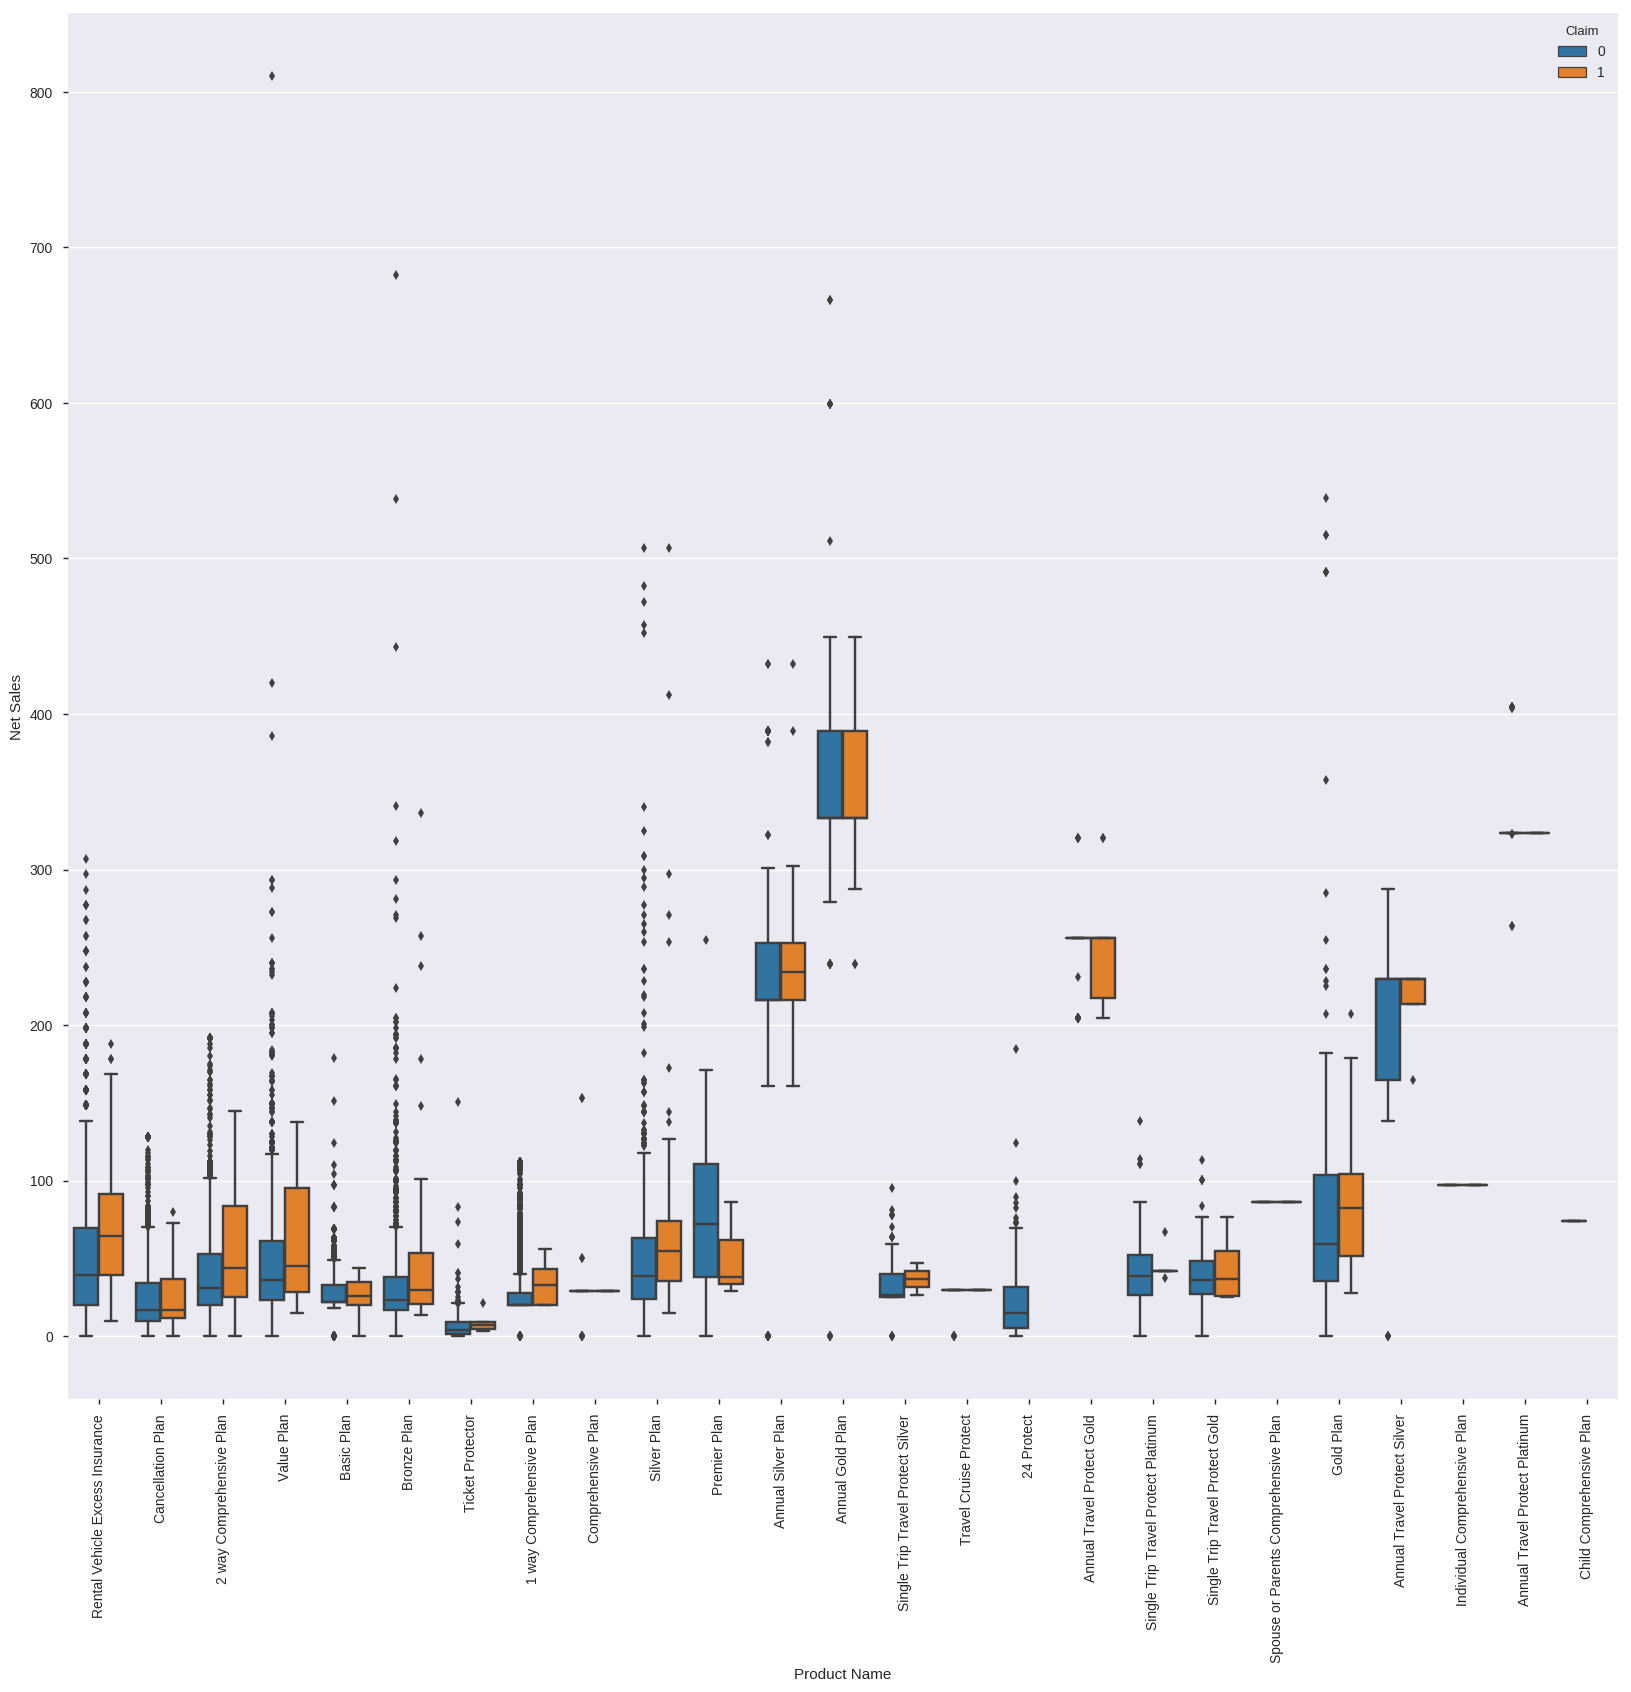

In [0]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 20
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Net Sales',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

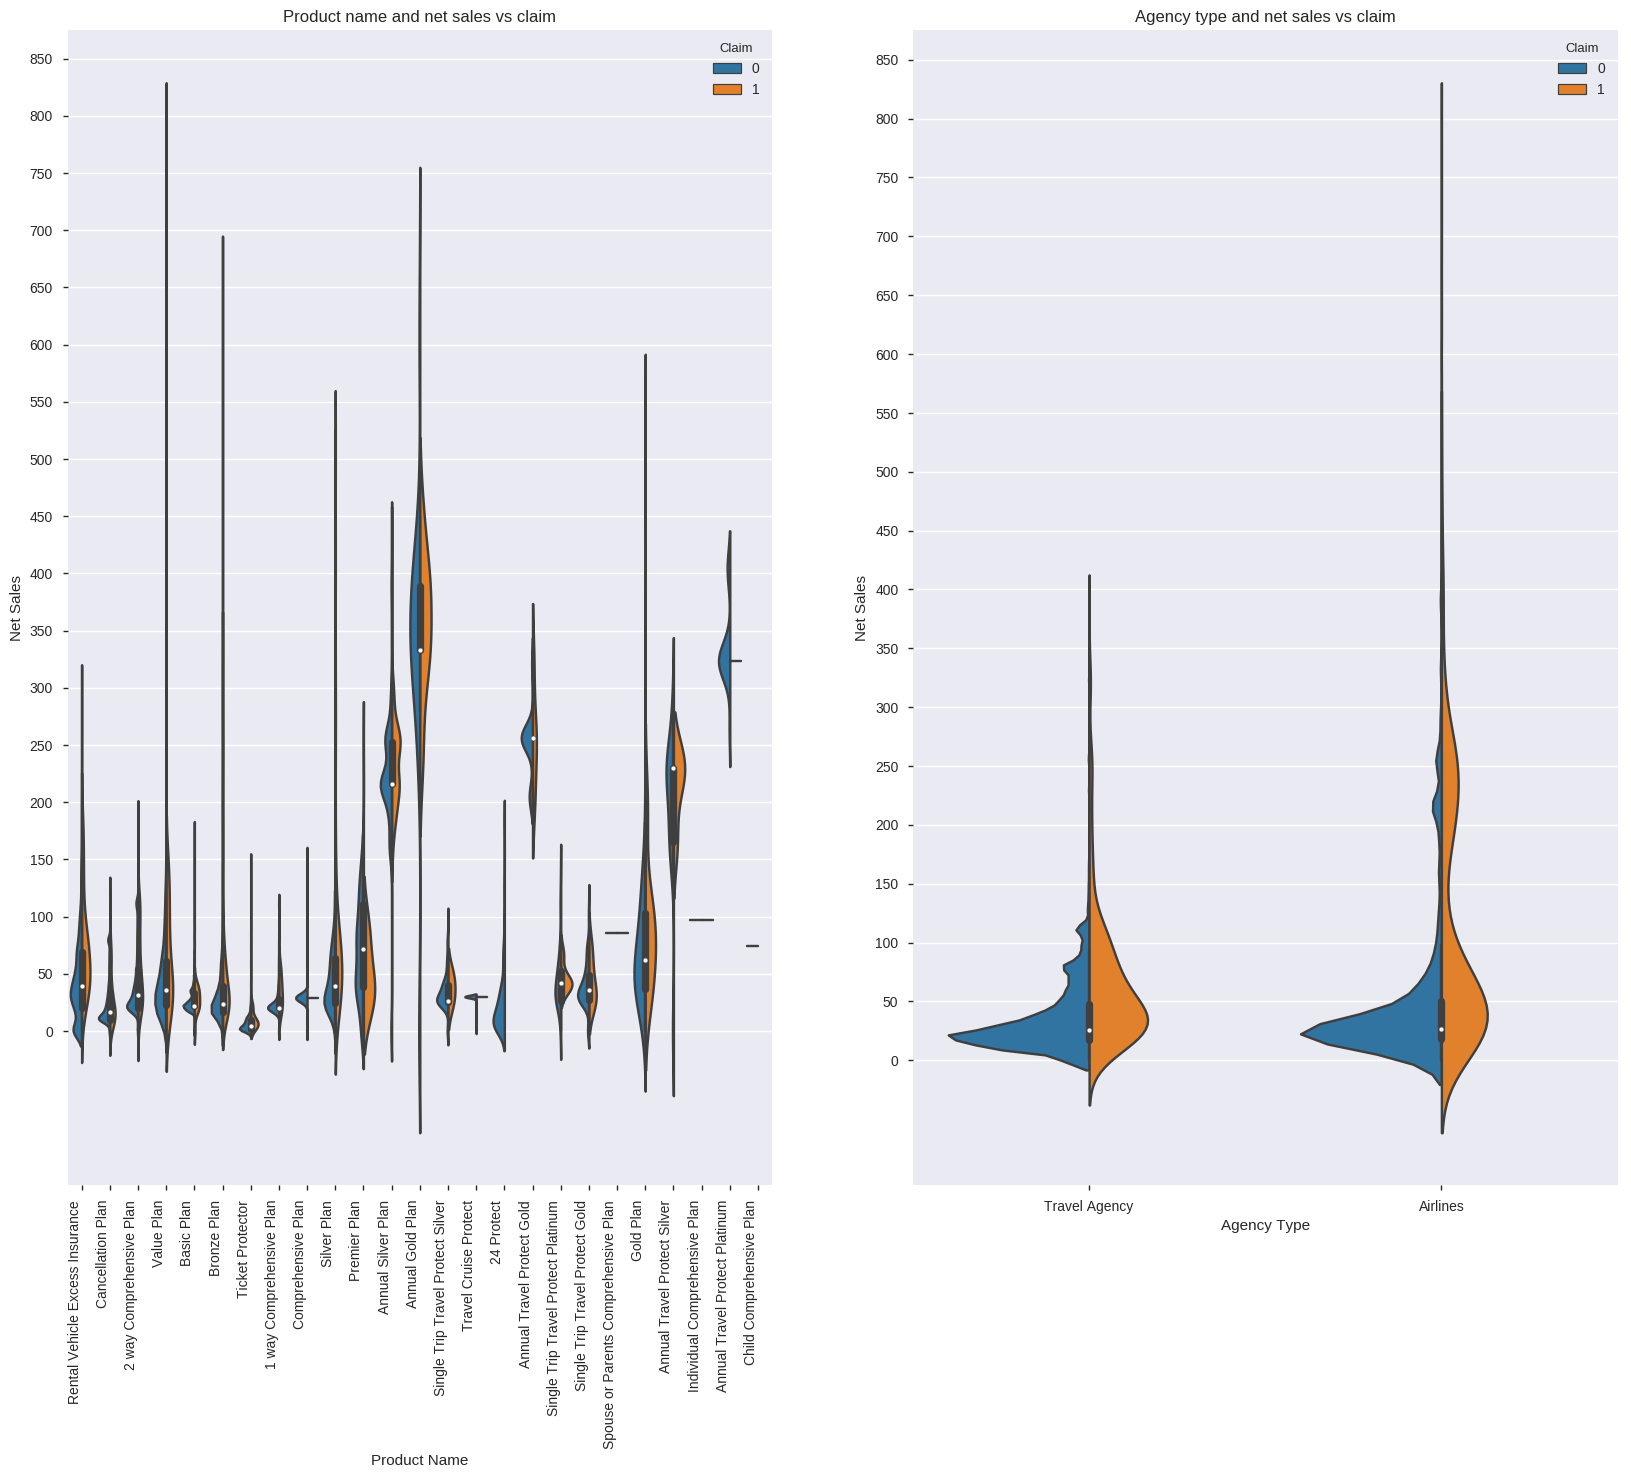

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,15))
sns.violinplot("Product Name","Net Sales", hue="Claim", data=df,split=True,ax=ax[0])
ax[0].set_title('Product name and net sales vs claim')
ax[0].set_yticks(range(0,900,50))
sns.violinplot("Agency Type","Net Sales", hue="Claim", data=df,split=True,ax=ax[1])
ax[1].set_title('Agency type and net sales vs claim')
ax[1].set_yticks(range(0,900,50))
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### Rename Variable Comission

[20.0, 18.0]


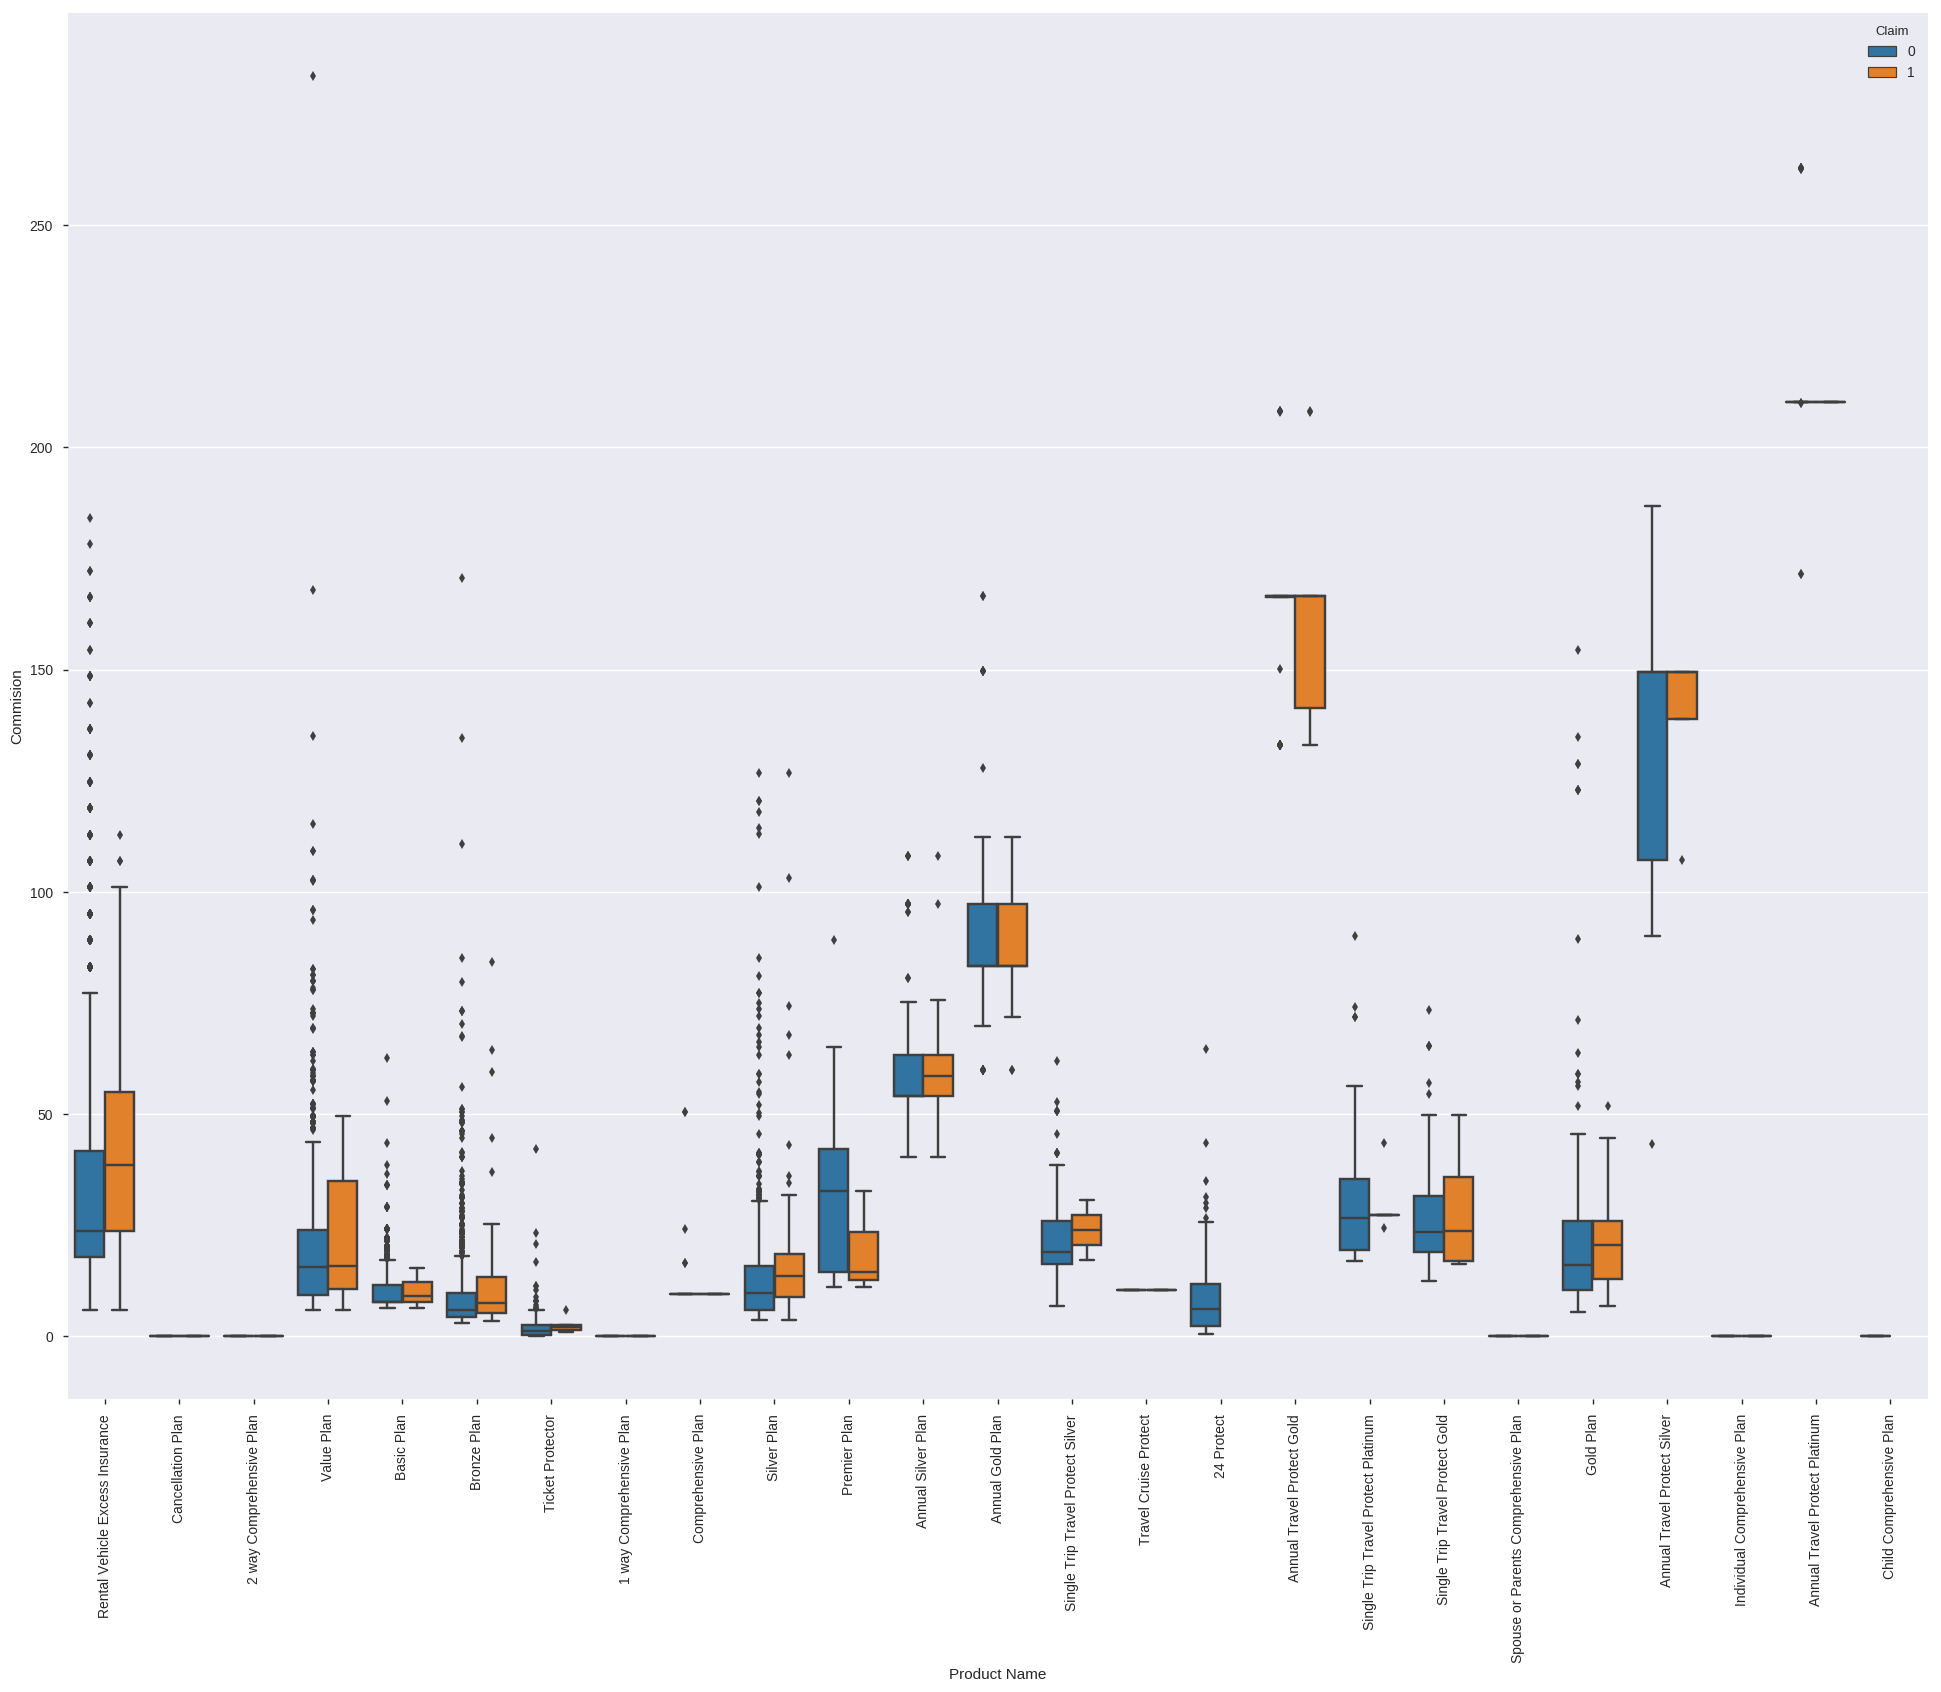

In [0]:
df.rename(columns={'Commision (in value)':'Commision'}, 
                 inplace=True)
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Commision',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

#### Age: Grouping by categories

In [0]:
df['age_category'] = pd.cut(x=df['Age'], bins=[-1,17,36,65,120], labels=['0','1','2', '3'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 13 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
age_category            50553 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 4.7+ MB


Text(0.5, 1.0, 'Claims Rate by Age')

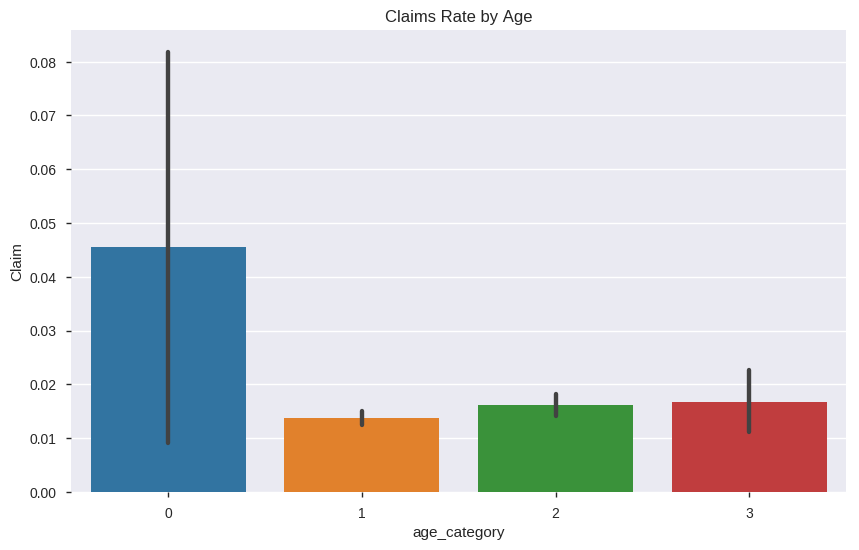

In [0]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='age_category',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

In [0]:
pd.crosstab(df['age_category'], df['Claim'])

Claim,0,1
age_category,,
0,105,5
1,32514,452
2,15246,251
3,1947,33


#### Destination and Claims Analysis

In [0]:
pd.crosstab(df['Destination'], df['Claim'])
#pd.crosstab(df['Destination'], df['Claim'], normalize=True)

Claim,0,1
Destination,,
ARGENTINA,16,1
AUSTRALIA,2906,28
AUSTRIA,84,0
AZERBAIJAN,6,0
BAHRAIN,11,0
BANGLADESH,83,0
BELARUS,2,0
BELGIUM,36,0
BERMUDA,2,0


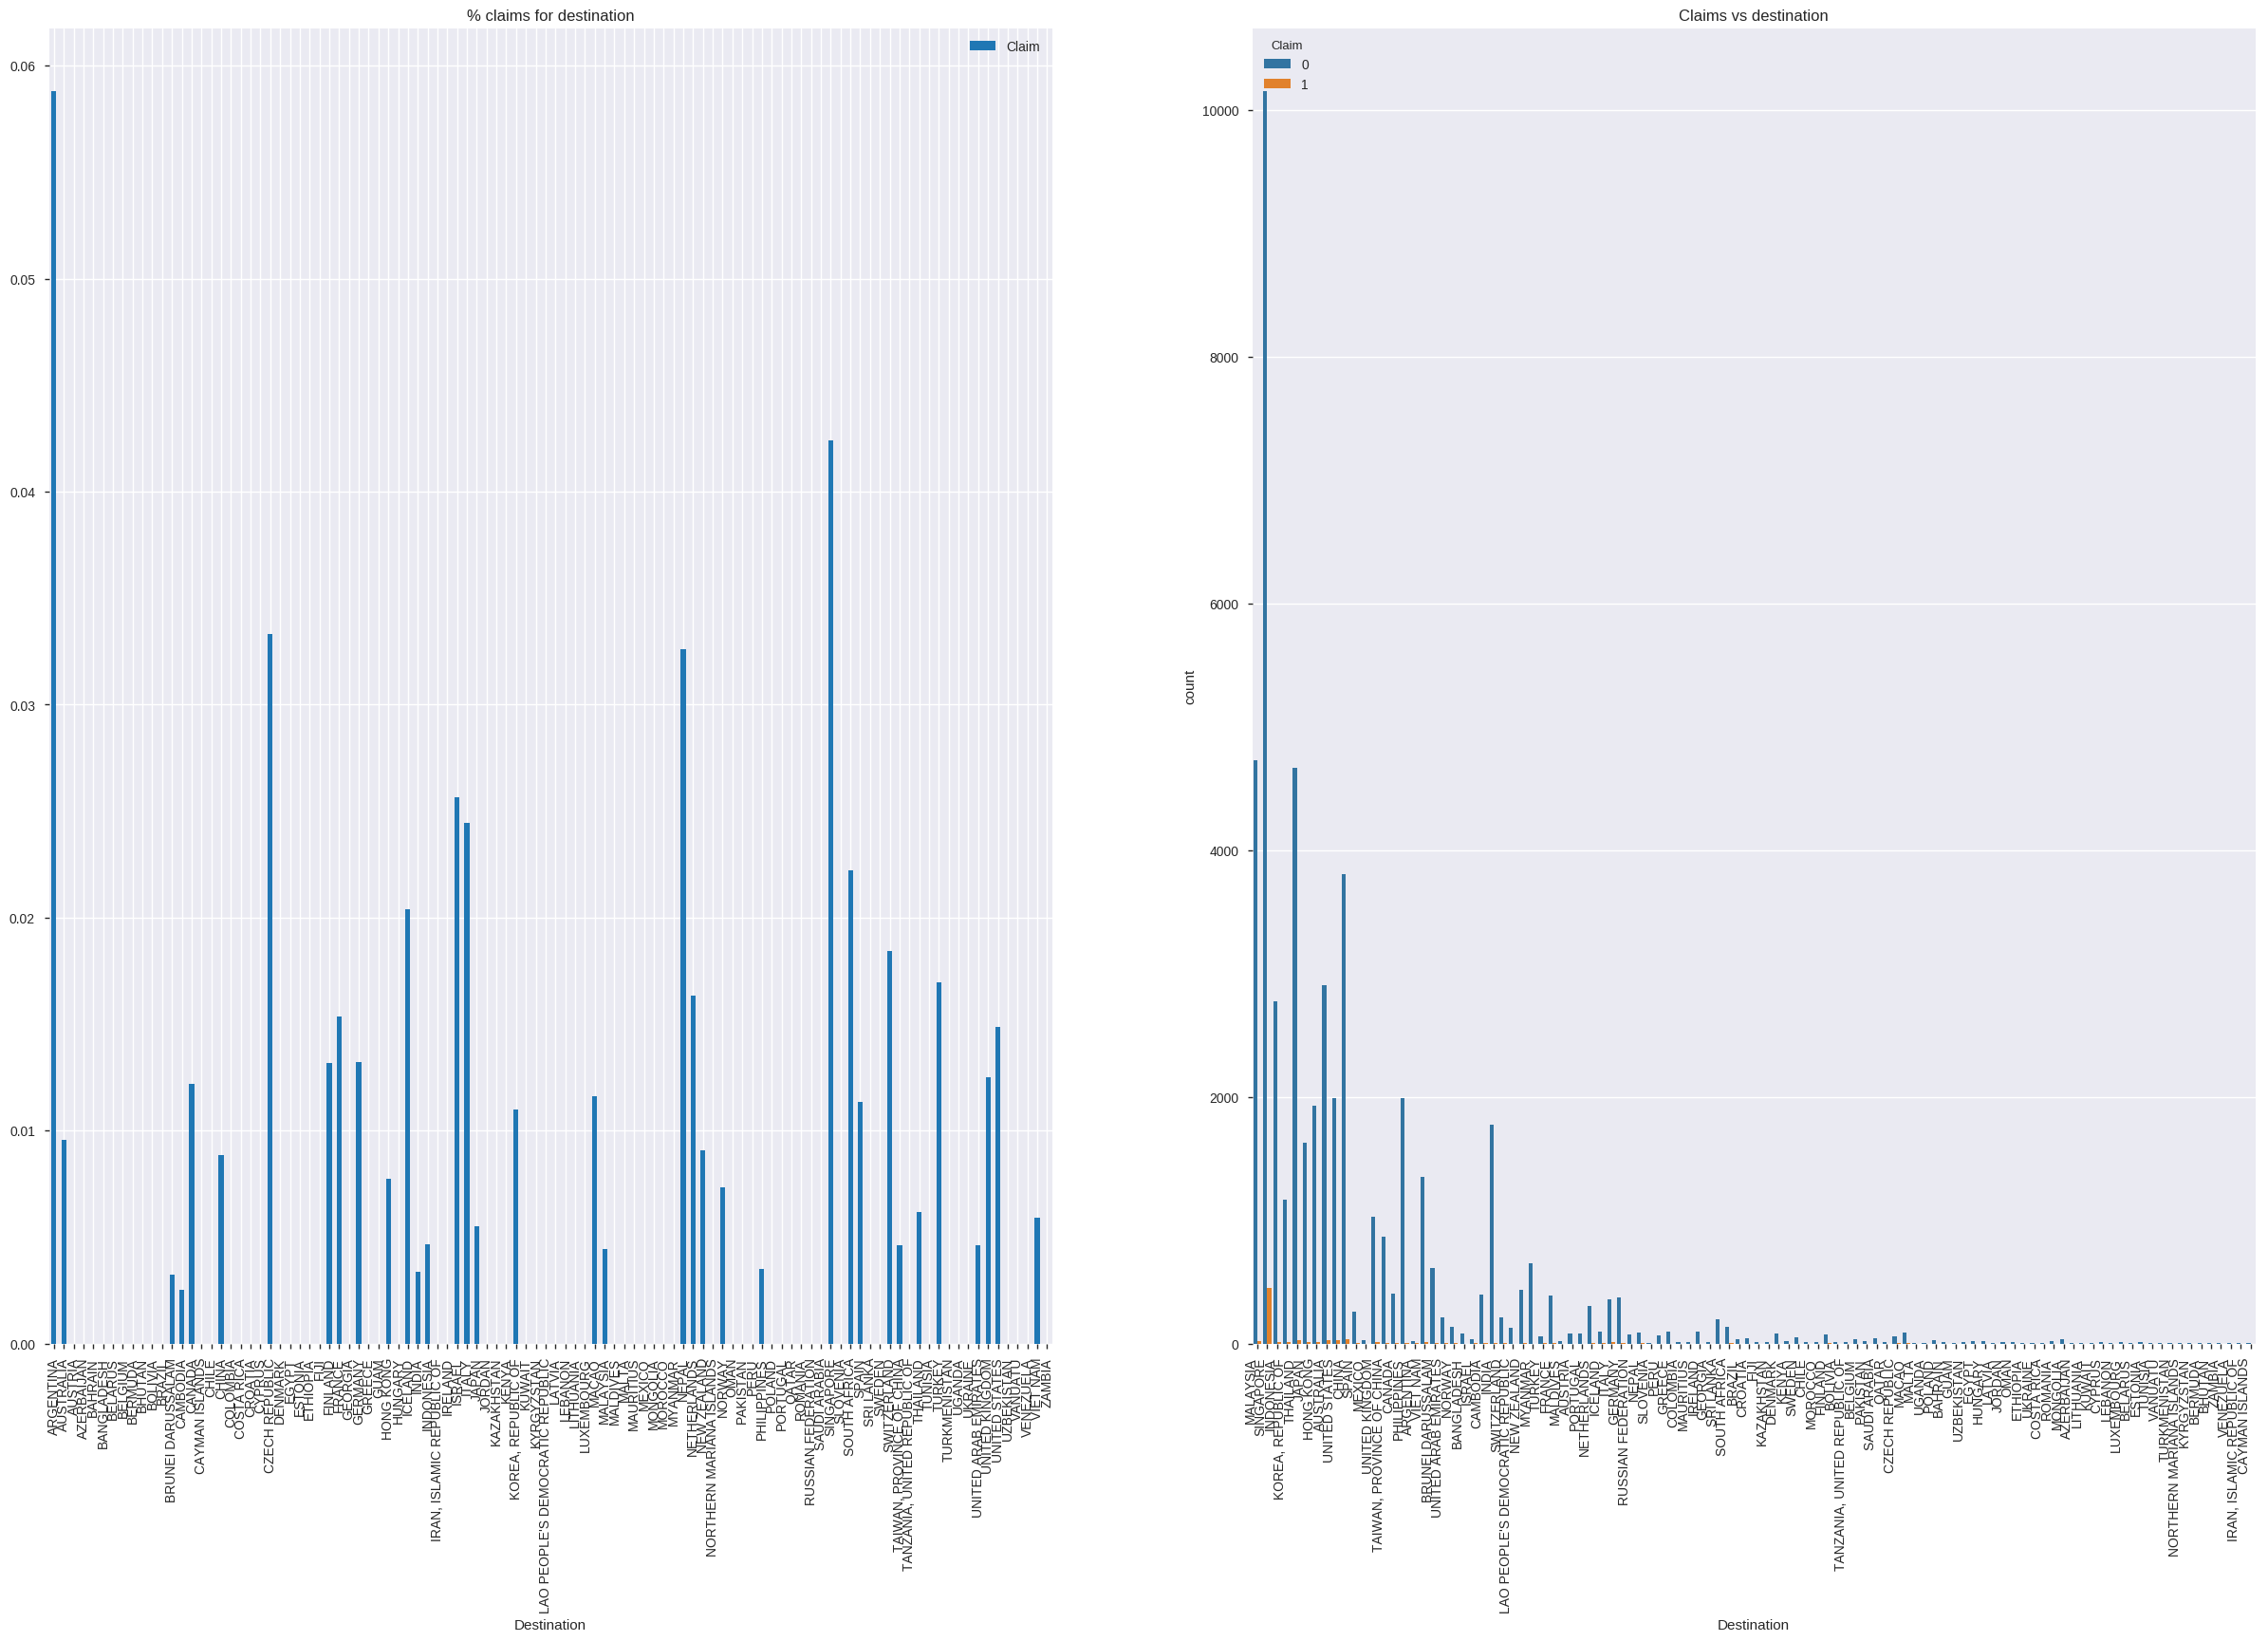

In [0]:
f,ax=plt.subplots(1,2,figsize=(30,18))
df[['Destination','Claim']].groupby(['Destination']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for destination')
sns.countplot('Destination',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs destination')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### CrossTab: Claim and Distribution Channel

96% of the bussines claims comers from Online channel.

In [0]:
pd.crosstab(df['Claim'], df['Distribution Channel'])

Distribution Channel,Offline,Online
Claim,,
0,871,48941
1,17,724


In [0]:
pd.crosstab(df['Claim'], df['Distribution Channel'], normalize=True)

Distribution Channel,Offline,Online
Claim,,
0,1.723e-02,0.968
1,3.363e-04,0.014


#### Correlation Analysis

The most correlated variable to our target 'Claims" is "Net Sales".'

In [0]:
# Pairwise Pearson correlations
from pandas import read_csv
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              ID  Claim  Duration  Net Sales  Commision    Age
ID         1.000  0.040     0.030      0.089      0.115  0.009
Claim      0.040  1.000     0.076      0.140      0.102 -0.012
Duration   0.030  0.076     1.000      0.456      0.349  0.003
Net Sales  0.089  0.140     0.456      1.000      0.693  0.040
Commision  0.115  0.102     0.349      0.693      1.000  0.119
Age        0.009 -0.012     0.003      0.040      0.119  1.000


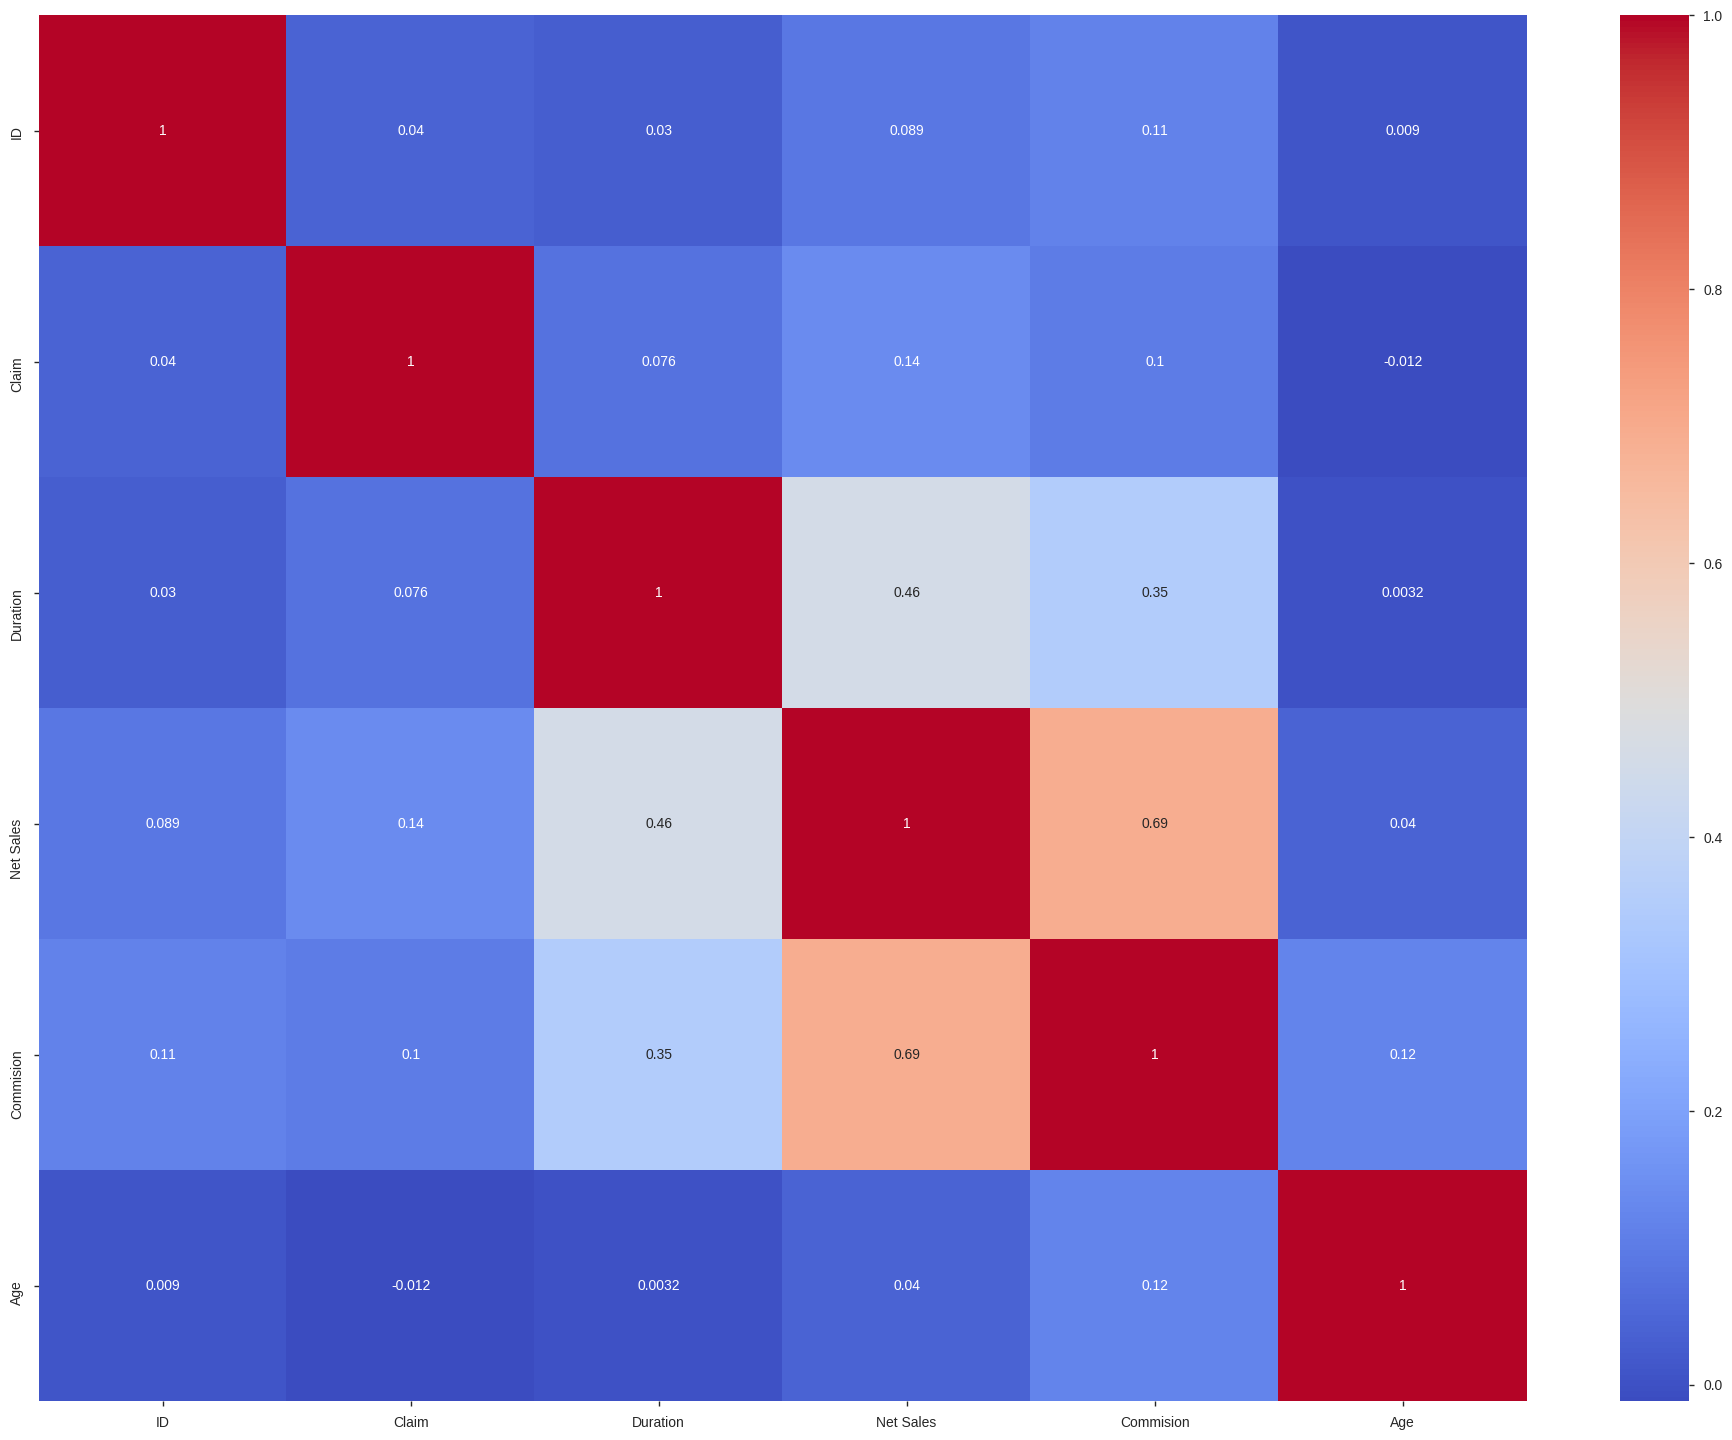

In [0]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## MIssing Data

### Detecting Missing Data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 13 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
age_category            50553 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 4.7+ MB


In [0]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
age_category                0
dtype: int64

In [0]:

'''
# percentage of missing values for every feature
missing_columns = (df.isnull().sum()*100) / len(df)
mask = missing_columns > 50
columns = missing_columns[mask].index.tolist()
print(columns)

# percentage of rows with more than 5 missing values
rows_percentage = (1 - (len(df.dropna(thresh=5)) / len(df)))*100
print(rows_percentage)
'''

'\n# percentage of missing values for every feature\nmissing_columns = (df.isnull().sum()*100) / len(df)\nmask = missing_columns > 50\ncolumns = missing_columns[mask].index.tolist()\nprint(columns)\n\n# percentage of rows with more than 5 missing values\nrows_percentage = (1 - (len(df.dropna(thresh=5)) / len(df)))*100\nprint(rows_percentage)\n'

In [0]:
# Import packages
#from sklearn.preprocessing import Imputer

In [0]:
#mode_imputer = Imputer(strategy='most_frequent')

In [0]:
# fit 'mode_imputer' on df['age_category']
#mode_imputer.fit(df[['age_category']])

In [0]:
#df['age_category'] = mode_imputer.transform(df[['age_category']])

#### Null Values Check

In [0]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
age_category                0
dtype: int64

#### Drop Gender Variables

In [0]:
df = df.drop(['Gender'], axis=1)

## Data Preparation

### One Hot Encoder¶

In [0]:
df.dtypes

ID                         int64
Agency                    object
Agency Type               object
Distribution Channel      object
Product Name              object
Claim                      int64
Duration                   int64
Destination               object
Net Sales                float64
Commision                float64
Age                        int64
age_category            category
dtype: object

In [0]:
# Fit-transform on data
df  = pd.get_dummies(df, columns=['age_category'],prefix = ['age'])
df  = pd.get_dummies(df, columns=['Distribution Channel'],prefix = ['channel'])
df  = pd.get_dummies(df, columns=['Product Name'],prefix = ['product'])
df  = pd.get_dummies(df, columns=['Destination'],prefix = ['to'])
df  = pd.get_dummies(df, columns=['Agency'], prefix = ['agency'])
df  = pd.get_dummies(df, columns=['Agency Type'], prefix = ['agency_type'])

"\ndf_enc = df_enc.drop(['Distribution Channel'], axis=1)\ndf_enc = df_enc.drop(['Product Name'], axis=1)\ndf_enc = df_enc.drop(['Destination'], axis=1)\n"

##### Drop Variables

In [0]:
df = df.drop(['ID'], axis=1)
df = df.drop(['Age'], axis=1)

# Transforming the TEST data set

In [0]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Data columns (total 11 columns):
ID                      12661 non-null int64
Agency                  12661 non-null object
Agency Type             12661 non-null object
Distribution Channel    12661 non-null object
Product Name            12661 non-null object
Duration                12661 non-null int64
Destination             12661 non-null object
Net Sales               12661 non-null float64
Commision (in value)    12661 non-null float64
Gender                  3605 non-null object
Age                     12661 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


In [0]:
test.rename(columns={'Commision (in value)':'Commision'}, 
                 inplace=True)

In [0]:
print(test['Duration'].min())

-1


In [0]:
test['Duration'][test['Duration'] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
test['age_category'] = pd.cut(x=test['Age'], bins=[-1,17,36,65,120], labels=['0','1','2', '3'])
test  = pd.get_dummies(test, columns=['age_category'], prefix = ['age'])
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Gender,Age,age_0,age_1,age_2,age_3
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47,0,0,1,0
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24,0,1,0,0
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36,0,1,0,0
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36,0,1,0,0
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36,0,1,0,0


In [0]:
test  = pd.get_dummies(test, columns=['Agency Type'], prefix = ['Agency_type'])
test.head()

,ID,Agency,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Gender,Age,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,25902,CWT,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47,0,0,1,0,0,1
1,19535,EPX,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24,0,1,0,0,0,1
2,43717,EPX,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36,0,1,0,0,0,1
3,48271,EPX,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36,0,1,0,0,0,1
4,52318,EPX,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36,0,1,0,0,0,1


In [0]:
test = test.drop(['Gender','ID','Age'], axis=1)
test.head()

,Agency,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,CWT,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,0,0,1,0,0,1
1,EPX,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,0,1,0,0,0,1
2,EPX,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,0,1,0,0,0,1
3,EPX,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,0,1,0,0,0,1
4,EPX,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,0,1,0,0,0,1


In [0]:
test.isnull().sum()

Agency                       0
Distribution Channel         0
Product Name                 0
Duration                     0
Destination                  0
Net Sales                    0
Commision                    0
age_0                        0
age_1                        0
age_2                        0
age_3                        0
Agency_type_Airlines         0
Agency_type_Travel Agency    0
dtype: int64

In [0]:
test_enc_hot = test.copy()

In [0]:
#test_enc_hot  = pd.get_dummies(test_enc_hot, columns=['Agency'], prefix = ['Agency'])
test_enc_hot  = pd.get_dummies(test_enc_hot, columns=['Distribution Channel'], prefix = ['channel'])
test_enc_hot  = pd.get_dummies(test_enc_hot, columns=['Product Name'], prefix = ['product'])
test_enc_hot  = pd.get_dummies(test_enc_hot, columns=['Destination'], prefix = ['to'])

In [0]:

test_enc_hot.head()

,Agency,Duration,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency,channel_Offline,channel_Online,product_1 way Comprehensive Plan,product_2 way Comprehensive Plan,product_24 Protect,product_Annual Gold Plan,product_Annual Silver Plan,product_Annual Travel Protect Gold,product_Annual Travel Protect Platinum,product_Annual Travel Protect Silver,product_Basic Plan,product_Bronze Plan,product_Cancellation Plan,product_Child Comprehensive Plan,product_Comprehensive Plan,product_Gold Plan,product_Individual Comprehensive Plan,product_Premier Plan,product_Rental Vehicle Excess Insurance,product_Silver Plan,product_Single Trip Travel Protect Gold,product_Single Trip Travel Protect Platinum,product_Single Trip Travel Protect Silver,product_Spouse or Parents Comprehensive Plan,product_Ticket Protector,product_Travel Cruise Protect,product_Value Plan,to_ARGENTINA,to_AUSTRALIA,to_AUSTRIA,...,to_MOROCCO,to_MYANMAR,to_NEPAL,to_NETHERLANDS,to_NEW ZEALAND,to_NORTHERN MARIANA ISLANDS,to_NORWAY,to_OMAN,to_PAKISTAN,to_PERU,to_PHILIPPINES,to_POLAND,to_PORTUGAL,to_QATAR,to_ROMANIA,to_RUSSIAN FEDERATION,to_SAUDI ARABIA,to_SINGAPORE,to_SLOVENIA,to_SOUTH AFRICA,to_SPAIN,to_SRI LANKA,to_SWEDEN,to_SWITZERLAND,"to_TAIWAN, PROVINCE OF CHINA","to_TANZANIA, UNITED REPUBLIC OF",to_THAILAND,to_TUNISIA,to_TURKEY,to_TURKMENISTAN,to_UGANDA,to_UKRAINE,to_UNITED ARAB EMIRATES,to_UNITED KINGDOM,to_UNITED STATES,to_UZBEKISTAN,to_VANUATU,to_VENEZUELA,to_VIET NAM,to_ZAMBIA
0,CWT,58,49.5,29.7,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,EPX,4,20.0,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,EPX,68,20.0,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,EPX,41,28.0,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,EPX,16,11.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model

### Splittig the Data

In [0]:
df_l = df.copy()

In [0]:
X = df_l.drop(['Claim'], axis=1)

In [0]:
y = df_l['Claim']

In [0]:
Y = y

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Feature Selection

#### Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the line of code below, we use PCA and select 3 principal components

In [0]:
array_x = X.values

In [0]:
array_y = y.values

In [0]:
array_x

array([[ 7.  ,  0.  , 17.82, ...,  0.  ,  0.  ,  1.  ],
       [85.  , 69.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [11.  , 19.8 , 11.88, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [24.  , 28.  , 10.64, ...,  0.  ,  0.  ,  1.  ],
       [25.  , 15.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 9.  , 20.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [0]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(array_x)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.84259117 0.14260274 0.01457448]
[[ 9.64300798e-01  2.52312109e-01  8.03711029e-02  2.23294529e-06
  -2.65145745e-04  2.53942408e-04  8.97039156e-06  4.53234197e-05
  -4.53234197e-05 -1.48710227e-04 -1.19998447e-04 -8.14163252e-06
   1.06069870e-04  7.61790509e-04  5.65581459e-05  3.32427119e-05
   5.02489267e-05 -1.57391434e-04 -1.45449841e-04 -3.80678254e-04
   3.95974233e-06  1.03600826e-05 -3.35134447e-06  3.39242993e-05
   3.36648164e-06 -6.38617024e-05 -5.71228555e-05 -6.67750027e-06
  -1.45845312e-06 -5.31860682e-06  6.89133026e-06  9.07185770e-05
  -8.82539799e-06 -5.01449809e-05 -4.22247364e-07  7.71999260e-06
   2.35035706e-06 -4.52490571e-08 -5.94731640e-07 -5.84224075e-06
  -1.65512663e-07 -4.50919082e-07  2.44634833e-08  1.49088030e-07
   8.46134945e-07  7.20989838e-08 -3.52786281e-05 -1.70921746e-05
   1.74761099e-05  8.46171196e-09 -2.26657398e-07 -1.04773788e-04
   5.40294850e-07  1.15713551e-09  2.78605948e-06 -1.15285506e-07
   2.52882263e-06  9.

#### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset

In [0]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(array_x, array_y)
print(model.feature_importances_)

[6.00003717e-01 1.98815486e-01 1.05050972e-01 1.12827814e-03
 4.86075006e-03 4.48932025e-03 2.49969196e-03 9.65138135e-04
 1.04040935e-03 1.09691685e-03 1.21307599e-03 4.93786153e-05
 9.06336905e-04 6.66070655e-03 7.96154208e-04 1.58230640e-04
 1.85195096e-04 5.32134363e-04 2.93434042e-03 1.58650170e-03
 9.54902608e-06 6.63299843e-05 7.73283788e-04 1.04431051e-04
 2.29168847e-04 6.08619431e-04 2.75808537e-03 6.35975876e-04
 7.98665770e-04 5.31658653e-04 8.71916875e-05 4.99518190e-04
 8.52560883e-05 7.84507010e-04 8.16473850e-04 2.86924730e-03
 1.18014184e-04 2.27677759e-07 8.89854482e-07 1.62517361e-05
 9.21448644e-06 5.04398233e-05 7.39081189e-08 1.94566598e-07
 5.04490316e-07 3.79655597e-06 2.43084842e-04 3.14986797e-05
 8.90806559e-04 1.39667250e-07 4.57640097e-08 1.17972398e-03
 2.05626141e-06 1.40492443e-06 2.17653098e-05 2.49385793e-06
 8.05860469e-04 4.21444577e-05 1.43974483e-06 6.82299494e-07
 1.21483891e-07 2.25666071e-06 2.71156352e-04 1.86864636e-03
 5.73213832e-07 4.708136

In [0]:
X.columns

Index(['Duration', 'Net Sales', 'Commision', 'age_0', 'age_1', 'age_2', 'age_3', 'channel_Offline',
       'channel_Online', 'product_1 way Comprehensive Plan',
       ...
       'agency_JWT', 'agency_JZI', 'agency_KML', 'agency_LWC', 'agency_RAB', 'agency_SSI',
       'agency_TST', 'agency_TTW', 'agency_type_Airlines', 'agency_type_Travel Agency'],
      dtype='object', length=154)

#### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute


In [0]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [0]:
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(array_x, array_y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 3
Selected Features: [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False  True False False False False False False]
Feature Ranking: [152 149 1

#### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class2 that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the Chi-Squared (χ2) statistical test for non-negative features to select 4 of the best features from dataset

In [0]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test_ = SelectKBest(score_func=chi2, k=4)
fit = test_.fit(array_x, array_y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(array_x)
# summarize selected features
print(features[0:5,:])

[6.149e+04 5.476e+04 2.120e+04 7.223e+00 2.046e+00 2.541e+00 5.532e-01
 1.237e+00 2.213e-02 2.483e+01 1.201e+01 2.960e+00 1.029e+02 7.387e+02
 6.639e+01 1.783e-01 8.142e+00 3.224e+01 2.793e+02 1.593e+02 1.041e-01
 1.175e-01 2.240e+01 5.517e+00 2.051e-01 1.053e+01 3.260e+02 9.494e+00
 2.107e+01 1.328e-03 3.919e+00 4.395e+00 2.861e+00 9.002e+00 2.296e+00
 5.314e+00 1.250e+00 8.926e-02 1.636e-01 1.235e+00 2.975e-02 5.355e-01
 2.975e-02 1.488e-02 1.339e-01 4.760e-01 5.540e+00 4.022e+00 1.722e-01
 1.488e-02 1.190e-01 8.918e+00 1.934e-01 8.926e-02 6.545e-01 1.785e-01
 1.449e+00 1.235e+00 2.529e-01 1.190e-01 5.950e-02 1.339e-01 1.184e-02
 1.279e-02 1.934e-01 5.355e-02 1.383e+00 1.041e-01 6.465e+00 2.678e-01
 2.244e-01 1.564e+01 1.926e+01 2.975e-02 1.488e+00 3.257e-01 2.446e+00
 9.497e+00 2.083e-01 1.785e-01 2.529e-01 1.096e+00 1.041e-01 5.950e-02
 1.874e+00 2.975e-02 5.950e-02 5.950e-02 1.190e-01 5.467e-02 3.442e+01
 3.124e-01 7.438e-02 1.488e-01 4.017e-01 4.760e-01 1.934e-01 9.714e+00
 2.053

# Evaluate Performance of ML Models

## LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Splitting the dataset into the Training set and Test set
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 98.603%


### K-fold Cross-Validation

Cross-validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split. It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The algorithm is trained on k − 1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set. After running cross-validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is more accurate because the algorithm is trained and evaluated multiple times on different data. The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common. In the example below we use 10-fold cross-validation.

In [0]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 98.532% (0.190%)


#####Leave One Out Cross-Validation

In [0]:
# Evaluate using Leave One Out Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

KeyboardInterrupt: ignored

### Classification Metrics

*   Classification Accuracy.

*   Logarithmic Loss.

* Area Under ROC Curve. 

* Confusion Matrix.

* Classification Report.








### Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy.

In [0]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.985 (0.002)


### Logarithmic Loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction. Below is an example of calculating logloss for Logistic regression predictions on the dataset.

In [0]:
# Cross Validation Classification LogLoss
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.065 (0.007)


### Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

􏰀 Sensitivity is the true positive rate, also called the recall. It is the number of instances from the positive (first) class that were actually predicted correctly.
       Logloss: -0.067 (0.007)
   


􏰀 Specificity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.

In [0]:
# Cross Validation Classification ROC AUC
from pandas import read_csv

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.826 (0.029)


### Confusion Matrix

In [0]:
# Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)


[[16450     1]
 [  232     0]]


### Classification Report

In [0]:
# Cross Validation Classification Report

from sklearn.metrics import classification_report

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16451
           1       0.00      0.00      0.00       232

    accuracy                           0.99     16683
   macro avg       0.49      0.50      0.50     16683
weighted avg       0.97      0.99      0.98     16683



## Compare Machine Learning Algorithms

Compare Machine Learning Algorithms 

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. 

Below six different classification algorithms are compared on a single dataset:
􏰀 Logistic Regression.
􏰀 Linear Discriminant Analysis.
􏰀 k-Nearest Neighbors.
􏰀 Classification and Regression Trees. 􏰀 Naive Bayes.
􏰀 Support Vector Machines.

In [0]:
'''
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
'''

## Automate Machine Learning with Pipeline

In [0]:
Y = y

#### Data Preparation and Modeling Pipeline

Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.
Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross-validation procedure. The example below demonstrates this important data preparation and model evaluation workflow on the Pima Indians onset of diabetes dataset. The pipeline is defined with two steps:
1. Standardize the data.
2. Learn a Linear Discriminant Analysis model.
The pipeline is then evaluated using 10-fold cross-validation.

In [0]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

0.9634442493332832


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Feature Extraction and Modeling Pipeline


Feature extraction is another procedure that is susceptible to data leakage. Like data preparation, feature extraction procedures must be restricted to the data in your training dataset. The pipeline provides a handy tool called the FeatureUnion which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs within each fold of the cross-validation procedure. The example below demonstrates the pipeline defined with four steps:
1. Feature Extraction with Principal Component Analysis (3 features). 2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.
The pipeline is then evaluated using 10-fold cross-validation.

In [0]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9851640146677685


## Ensemble Method

###Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning. In the example below is an example of using the BaggingClassifier with the Classification and Regression Trees algorithm
(DecisionTreeClassifier1). A total of 100 trees are created.

In [0]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.982157266899548


###Random Forest
Random Forests is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. You can construct a Random Forest model for classification using the RandomForestClassifier class2. The example below demonstrates using Random Forest for classification with 100 trees and split points chosen from a random selection of 3 features.

In [0]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9822759925628217


### Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset. You can construct an Extra Trees model for classification using the ExtraTreesClassifier class3. The example below provides a demonstration of extra trees with the number of trees set to 100 and splits chosen from 7 random features.

In [0]:
# Extra Trees Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9797835479034418


### AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less or more attention to them in the construction of subsequent models. You can construct an AdaBoost model for classification using the AdaBoostClassifier class4. The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.

In [0]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9853420327348534


###Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles. You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class5. The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.

In [0]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9851244420551153


### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data. The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from sub-models, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classification using the VotingClassifier class6. The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem.

In [0]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

In [0]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

NameError: ignored

## Improve Performance with Algorithm Tuning

### Grid Search Parameter Tuning

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

In [0]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = RidgeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)


### Random Search Parameter Tuning
Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed and evaluated for each combination of parameters chosen. You can perform a random search for algorithm parameters using the RandomizedSearchCV class2. The example below evaluates different random alpha values between 0 and 1 for the Ridge Regression algorithm on the standard diabetes dataset. A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).

In [0]:
# Randomized for Algorithm Tuning
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
model = RidgeClassifier()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


NameError: ignored

In [0]:
from sklearn.neighbors import LocalOutlierFactor
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()